# Preliminaries
To use the MIT-BIH database we need the external python library wfdb.

To install wfdb simply run "pip install wfdb". More info about wfdb can be found here https://wfdb.readthedocs.io/en/latest/

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

In [2]:
record = wfdb.rdrecord('mitdb/100')
annotation = wfdb.rdann('mitdb/100', 'atr')
display(record.__dict__)
display(annotation.__dict__)

{'record_name': '100',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 650000,
 'base_time': None,
 'base_date': None,
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'sig_name': ['MLII', 'V5'],
 'p_signal': array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ...,
        [-0.675, -0.365],
        [-0.765, -0.335],
        [-1.28 ,  0.   ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100.dat', '100.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [995, 1011],
 'checksum': [-22131, 20052],
 'block_size': [0, 0]}

{'record_name': '100',
 'extension': 'atr',
 'sample': array([    18,     77,    370, ..., 649484, 649734, 649991]),
 'symbol': ['+',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'A',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N'

In [3]:
# All relevant symbols for this research.
relsym = set("NLRejV!EAaSJF/fQ")

def to_aami(ba):
    if ba in set("NLRej"):
        return "Normal"
    if ba in set("V!E"):
        return "Ventricular"
    if ba in set("AaSJ"):
        return "Supraventricular"
    if ba == "F":
        return "Fusion beat"
    if ba in set("/fQ"):
        return "Unknown beats"
    else: 
        return "This should not be happening."


data = {}
for file in os.listdir("mitdb"):
    if file.endswith(".atr"):
        annotation = wfdb.rdann("mitdb/"+file.split(".")[0], 'atr')
        count = {}
        for a in annotation.symbol:
            if a in relsym: 
                if a in count:
                    count[a] += 1
                else:
                    count[a] = 1
        data[annotation.record_name] = count

In [4]:
# Print count of all BA beats per patient
for patient in data:
    print("--- Patient no. {} ---".format(patient))
    s = sum(data[patient].values())
    for (k, v) in data[patient].items():
        print("{}: {:.2%}\t{}".format(k, v/s, v))
    print("-----------------------")
        
    

--- Patient no. 100 ---
N: 98.50%	2239
A: 1.45%	33
V: 0.04%	1
-----------------------
--- Patient no. 101 ---
N: 99.73%	1860
Q: 0.11%	2
A: 0.16%	3
-----------------------
--- Patient no. 103 ---
N: 99.90%	2082
A: 0.10%	2
-----------------------
--- Patient no. 105 ---
N: 98.21%	2526
V: 1.59%	41
Q: 0.19%	5
-----------------------
--- Patient no. 106 ---
N: 74.35%	1507
V: 25.65%	520
-----------------------
--- Patient no. 107 ---
/: 97.24%	2078
V: 2.76%	59
-----------------------
--- Patient no. 108 ---
N: 98.64%	1739
V: 0.96%	17
F: 0.11%	2
A: 0.23%	4
j: 0.06%	1
-----------------------
--- Patient no. 109 ---
L: 98.42%	2492
F: 0.08%	2
V: 1.50%	38
-----------------------
--- Patient no. 111 ---
L: 99.95%	2123
V: 0.05%	1
-----------------------
--- Patient no. 112 ---
N: 99.92%	2537
A: 0.08%	2
-----------------------
--- Patient no. 113 ---
N: 99.67%	1789
a: 0.33%	6
-----------------------
--- Patient no. 114 ---
N: 96.86%	1820
V: 2.29%	43
J: 0.11%	2
F: 0.21%	4
A: 0.53%	10
----------------

--- Patient 100 ---
  - MLII
  - V5
--- Patient 101 ---
  - MLII
  - V1
--- Patient 103 ---
  - MLII
  - V2
--- Patient 105 ---
  - MLII
  - V1
--- Patient 106 ---
  - MLII
  - V1
--- Patient 107 ---
  - MLII
  - V1
--- Patient 108 ---
  - MLII
  - V1
--- Patient 109 ---
  - MLII
  - V1
--- Patient 111 ---
  - MLII
  - V1
--- Patient 112 ---
  - MLII
  - V1
--- Patient 113 ---
  - MLII
  - V1
--- Patient 114 ---
  - V5
  - MLII
--- Patient 115 ---
  - MLII
  - V1
--- Patient 116 ---
  - MLII
  - V1
--- Patient 117 ---
  - MLII
  - V2
--- Patient 118 ---
  - MLII
  - V1
--- Patient 119 ---
  - MLII
  - V1
--- Patient 121 ---
  - MLII
  - V1
--- Patient 122 ---
  - MLII
  - V1
--- Patient 123 ---
  - MLII
  - V5
--- Patient 124 ---
  - MLII
  - V4
--- Patient 200 ---
  - MLII
  - V1
--- Patient 201 ---
  - MLII
  - V1
--- Patient 202 ---
  - MLII
  - V1
--- Patient 203 ---
  - MLII
  - V1
--- Patient 205 ---
  - MLII
  - V1
--- Patient 207 ---
  - MLII
  - V1
--- Patient 208 ---
  - MLII

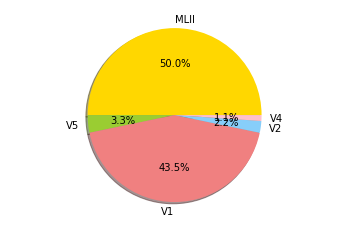

In [5]:
# prints signals used for all patients
labels, values = [], []
for file in os.listdir("mitdb"):
    if file.endswith(".atr"):
        record = wfdb.rdrecord("mitdb/"+file.split(".")[0])
        print("--- Patient {} ---".format(record.record_name))
        for s in record.sig_name:
            print("  - {}".format(s))
            if s in labels:
                values[labels.index(s)] += 1
            else:
                labels.append(s)
                values.append(1)

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink']

plt.axis('equal')
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

Normal: 90369		85.62%
Supraventricular: 2781		2.63%
Ventricular: 7702		7.30%
Unknown beats: 3895		3.69%
Fusion beat: 803		0.76%


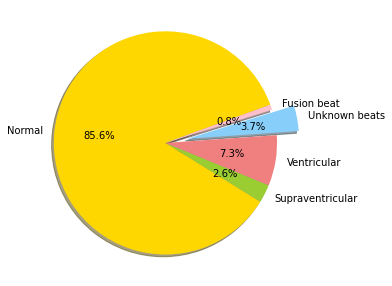

In [6]:
labels, values, percentage = [], [], []
for patient in data:
    for (k, v) in data[patient].items():
        k = to_aami(k)
        if k in labels:
            values[labels.index(k)] += v
        else:
            labels.append(k)
            values.append(v)

s = sum(values)
for v in values:
    percentage.append("{:.2%}".format(v/s))

for i in range(len(labels)):
    print("{}: {}\t\t{}".format(labels[i],values[i],percentage[i]))

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink']
explode = [0,0,0,0.2,0]

# Plot
plt.axis('equal')
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=20)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()